### Raising prior to the power $1/$(number of chunks).

In [1]:
# Calling libraries:
from __future__ import division
%matplotlib inline
import numpy as np, time, matplotlib.pyplot as plt, math, pandas, numpy.random as npr, pystan as ps
from pylab import plot, show, legend
from time import time
from scipy.stats import *
from Ricker_functions import *

In [2]:
sm = ps.StanModel(file="ricker_cmc.stan")

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_3247a99bc4ed32bdcfb49a0a7dbbd899 NOW.


In [3]:
x_0 = 5.
T = 50_000
r, sigma, phi = np.exp(2.8), 0.5, 3
theta = np.asarray([r, sigma, phi])

X, y = simulate_data(x_0, T, theta)

### Divide-and-conquer

In [6]:
n_chains = 10
m = 10
tstarts = np.arange(m).astype(int)
tends = 1 + tstarts
tstarts *= int(T/m)
tends *= int(T/m)

In [ ]:
traces = [[]]*m
for i in range(m) :
    tstart, tend = tstarts[i], tends[i]
    data = dict(T=tend-tstart, y=y[tstart:tend], x_0=x_0, power=T/(tend-tstart))
    fit = sm.sampling(data=data, thin=1, n_jobs=min(10,n_chains), chains=n_chains, init="random", iter=1_000)
    traces[i] = fit.extract()

To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)
To run all diagnostics call pystan.check_hmc_diagnostics(fit)


In [16]:
phi_ci = np.zeros(2)
logr_ci = np.zeros(2)
sigma_ci = np.zeros(2)
for i in range(int(m)) :
    phi_ci += np.percentile(traces[i]['phi'],q=[2.5,97.5])/m
    logr_ci += np.percentile(traces[i]['logr'],q=[2.5,97.5])/m
    sci = np.percentile(traces[i]['sigma'],q=[2.5,97.5])
    sigma_ci += np.percentile(traces[i]['sigma'],q=[2.5,97.5])/m

In [17]:
print("phi credible interval divide-and-conquer:", phi_ci)
# print("phi credible interval MCMC on full data :", np.percentile(trace['phi'],q=[2.5,97.5]))
print("               True phi                 :", phi)

phi credible interval divide-and-conquer: [7.44252732e-307 1.23763786e-306]
               True phi                 : 3


In [18]:
print("log r credible interval divide-and-conquer:", logr_ci)
# print("log r credible interval MCMC on full data:", np.percentile(trace['logr'],q=[2.5,97.5]))
print("               True log r                 :", np.log(r))

log r credible interval divide-and-conquer: [-8.62856588 50.6364734 ]
               True log r                 : 2.8


In [19]:
print("sigma credible interval divide-and-conquer:", sigma_ci)
# print("sigma credible interval MCMC on full data:", np.percentile(trace['sigma'],q=[2.5,97.5]))
print("               True sigma                 :", sigma)

sigma credible interval divide-and-conquer: [1.06646217e+307 1.79444966e+307]
               True sigma                 : 0.5


(0, 5001)

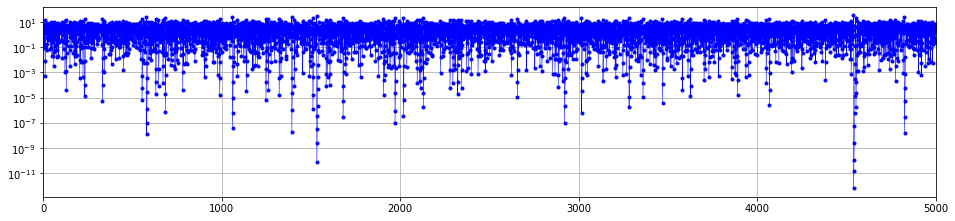

In [22]:
i = 0
tstart, tend = tstarts[i], tends[i]
plt.rcParams['figure.figsize'] = (16, 3.5)
plt.plot(1+np.arange(tstart,tend), X[tstart:tend], 'bo-', markersize=3, lw=0.5)
# plt.fill_between(1+np.arange(t_start,t_end), np.percentile(particles[1:],axis=1,q=5), 
#                  np.percentile(particles[1:],axis=1,q=95), color='red', alpha=.3)
plt.grid(True)
plt.yscale('log')
plt.xlim(tstart,tend+1)